# She, --, He: Syntactic Interruptions and Gendered Agency in Katherine Mansfield

## Claire Kuo

16 December 2020

Introduction to Computational Literary Analysis

Department of English and Comparative Literature, Columbia University

Instructor: Jonathan Reeve

### Abstract
In this project, I attempt to explore the relationship between syntactic interruptions and gendered agency in Katherine Mansfield’s work through computational analysis. In doing so, I will be narrowing my analysis to two short stories: "Her First Ball" and "The Stranger". Through my analysis of "Her First Ball", I aim to prove the dual function of em dashes in the work as both an indicator of shifts in emotion as well as agency. This analysis will be further extended in "The Stranger" where gendered dynamics are complicated by marriage. In "The Stranger", I intend to demonstrate that even though em dashes still largely function in a similar manner, there is a slight twist. The female protagonist is able to gain agency away from her husband, but is ultimately unable to do so fully due to the constraints of marriage.

In [1]:
import requests
import json
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

### Corpus
The corpus will consist of the short stories in Mansfield’s collection *The Garden Party, and Other Stories*. However, for reasons explained below, there will be a particular focus on "Her First Ball" and "The Stranger".

In [2]:
#Below is a function with which I will be retrieving texts to assemble my corpus.
def getFullText(bookId):
    url = f"http://corpus-db.org/api/id/{bookId}/fulltext"
    response = requests.get(url)
    if response.ok:
        bookText = json.loads(response.text)
        return bookText[0]["text"]

In [3]:
#This will retrieve individual stories within the collection.
gardenPartyFullText = getFullText(1429.0)
gardenPartyFull = gardenPartyFullText.split("\n\n\n\n\n")

In [4]:
#Cleaning up the text by removing extraneous information like the table of contents that may otherwise interfere with computational analysis.
gardenPartyStories = gardenPartyFull[2:17]

### Corpus Analysis

We can first approach the entire corpus with a few possible metrics. Syntactic interruptions would encompass em dashes, ellipses, and parentheses. To measure gendered agency, I focused on male pronouns, female pronouns, as well as pronoun differences (female minus male). In my calculations, I utilized the count function to count the number of times each appeared and accounted for the overall number of words (tokens) in a particular story, thereby producing a proportionate ratio. All are labelled in the table below.

In [5]:
#Obtain all the tokens in each story.
stories = ["At the Bay", "The Garden Party", "The Daughters of the Late Colonel", 
           "Mr. and Mrs. Dove", "The Young Girl", "Life of Ma Parker",
           "Marriage a la Mode", "The Voyage", "Miss Brill", "Her First Ball", 
           "The Singing Lesson", "The Stranger", "Bank Holiday", "An Ideal Family", 
           "The Lady's Maid"]
storiesDict = {story: text for story, text in zip(stories, gardenPartyStories[::])}

allTokens = []
for story in storiesDict:
    text = storiesDict[story]
    storyTokens = nltk.word_tokenize(text)
    allTokens.append(storyTokens)

In [6]:
#This function will be able to take in tokens and anywhere between one to three strings. 
#It will search the tokens for these strings and return a cumulative count of how many times they appear.
def stringCounter(tokens, string, string2=None, string3=None):
    strCount = []
    strCount.append(tokens.count(string) + tokens.count(string2) + tokens.count(string3))
    return strCount

In [7]:
#Count the number of syntactic interruptions and pronouns in each story.
emDashCount = []
ellipseCount = []
parenthesisCount = []
maleCount = []
femaleCount = []
for storyTokens in allTokens:
    emDashCount.append(stringCounter(storyTokens, "--")[0])
    ellipseCount.append(stringCounter(storyTokens, "...")[0])
    parenthesisCount.append(stringCounter(storyTokens, "(")[0])
    maleCount.append(stringCounter(storyTokens, "he", "him", "his")[0])
    femaleCount.append(stringCounter(storyTokens, "she", "her", "hers")[0])

In [8]:
#This will take into account the length of text/number of tokens.
numTokens = []
for storyTokens in allTokens:
    numTokens.append(len(storyTokens))

In [9]:
#This is a function that will calculate the ratio of syntactic interruptions to the number of tokens in the text.
def textTokenRatio(numTokensList):
    ratio = []
    i = 0
    for num in numTokensList:
        ratio.append(numTokensList[i]*10/numTokens[i])
        i += 1
    return ratio

In [10]:
#Ratios of syntactic interruptions and gendered pronouns
ellipseRatios = textTokenRatio(ellipseCount)
emDashRatios = textTokenRatio(emDashCount)
parenthesisRatios = textTokenRatio(parenthesisCount)
malePronounRatios = textTokenRatio(maleCount)
femalePronounRatios = textTokenRatio(femaleCount)

In [11]:
#Calculating the pronoun differences
pronounDiffs = []
i = 0
for num in femalePronounRatios:
    diff = num - malePronounRatios[i]
    i += 0
    pronounDiffs.append(diff)

In [12]:
#Creating a table to visualize the ratios for each story
i = 0
interruptionsDict = {}
for story in stories:
    interruptionsDict[story]= [ellipseRatios[i], emDashRatios[i], parenthesisRatios[i], femalePronounRatios[i], malePronounRatios[i], pronounDiffs[i]]
    i += 1

#creating dataframe
interruptionsDF= pd.DataFrame(interruptionsDict).T
interruptionsDF.columns = ["ellipses", "em dashes", "parenthesis", "female", "male", "pronoun diff"]
interruptionsDF

,ellipses,em dashes,parenthesis,female,male,pronoun diff
At the Bay,0.017349,0.050849,0.000000,0.205791,0.132807,0.072984
The Garden Party,0.012881,0.047231,0.000000,0.247603,0.071561,0.114796
The Daughters of the Late Colonel,0.021920,0.076721,0.001096,0.226874,0.111793,0.094067
Mr. and Mrs. Dove,0.034610,0.094601,0.000000,0.281495,0.302261,0.148688
The Young Girl,0.028080,0.196560,0.000000,0.435240,0.063180,0.302434
Life of Ma Parker,0.047710,0.076336,0.000000,0.346692,0.213104,0.213885
Marriage a la Mode,0.032408,0.046587,0.000000,0.151914,0.180271,0.019107
The Voyage,0.010222,0.017889,0.000000,0.316892,0.069001,0.184086
Miss Brill,0.016771,0.138365,0.000000,0.331237,0.075472,0.198430
Her First Ball,0.015713,0.043997,0.003143,0.285984,0.113136,0.153177


In the table, I found that parentheses were relatively few and far in between, which made it difficult to draw any definitive conclusions. While ellipses were slightly more common, the majority of syntactic interruptions were em dashes. Hence, for more meaningful analysis, I will be honing in on em dashes as an indicator of gendered agency. For the most part, em dashes and pronoun differences are positively correlated with the notable exception of "The Stranger".  In "The Stranger" pronoun differences sharply drop and em dashes increase. After some closer examination, these aberrations seem to mainly occur in stories that tackle marriage or family (Mr. and Mrs. Dove, Marriage a la Mode)–– a more complex relationship that I will explore later on with "The Stranger".

### Syntactic Interruptions in "Her First Ball"
To provide a baseline for later analysis, em dashes and pronouns will be analyzed in "Her First Ball". The First Ball, a relatively typical datapoint, also has some advantages. It is a story that does not yet deal with marriage/family and consequently has more clear cut lines across gendered agency. Pronouns also more reliably refer to main protagonist (female) and antagonist (male). My methodology in computationally analyzing the story was to first break the story down into paragraphs. In each paragraph, pronouns are once again counted. However, pronouns are separated into four categories: “she”, “her”/ “hers”, “he”, and “him”/ “his”. “She” would indicate that a female character is the subject and possibly the agent of what is happening in the particular paragraph. “Her”/ “hers” would imply the female character is the object and acted upon. The same logic is applied to male pronouns. 

In [13]:
#This function will create a Series that take in up to three strings and count them in a particular story.
def createSeries(storyIndex, string, string2 = None, string3 = None):
    stringParas = []
    paras = gardenPartyFull[storyIndex].split("\n\n")
    for para in paras:
        tokens = nltk.word_tokenize(para)
        stringParas.append(stringCounter(tokens, string, string2, string3)[0])
    return pd.Series(stringParas)

In [14]:
emdashPD = createSeries(11, "--")
femaleObjPD = createSeries(11, "her", "hers")
femaleSubPD = createSeries(11, "she")
maleObjPD = createSeries(11, "him", "his")
maleSubPD = createSeries(11, "he")
narrPD = createSeries(11, "I")
ellipsesPD = createSeries(11, "...")

<AxesSubplot:>

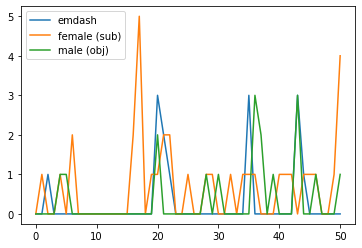

In [15]:
#This will generate a figure to help better visualize trends across narrative time.
fullDF = pd.concat([emdashPD, femaleSubPD, maleSubPD], axis= 1)
fullDF = fullDF.rename(columns={0: 'emdash', 1: "female (sub)", 2: "male (obj)"})
fullDF.plot()

As shown in the figure, the em dashes are very closely aligned with the appearance of male, subject pronouns. It would seem to suggest that as male agency increases, so do em dashes. The appearance of em dashes also correlates with an increase of female, object pronouns. At the same time, female subject pronouns plateau or dip, implying that female agency decreases in those moments. The concordances of these em dashes indicate that most of them appear in conjunction with the central tension of the story–– an unpleasant old balding man who invites the protagonist to dance. Overall, this seemed to read as an instance where em dashes indicate decreasing agency in a particular character. However, as em dashes aren’t an absolute quantifier of agency and could just merely imply emotional fluctuations in the protagonist, I close read paragraph 35 and paragraph 43. 

In [16]:
gp = nltk.Text(nltk.word_tokenize(gardenPartyFull[11]))
gp.concordance("--", lines = 15)

Displaying 14 of 14 matches:
eila ? But , my child , how too weird -- '' cried the Sheridan girls . `` Our 
other . Strange faces smiled at Leila -- sweetly , vaguely . Strange voices an
e was crooked . Then quite an old man -- fat , with a big bald patch on his he
t , with a big bald patch on his head -- took her programme and murmured , `` 
ence between that dusty-smelling hall -- with calico texts on the walls , the 
 girls' feet with her long white wand -- and this was so tremendous that Leila
 showed the stars . `` Ours , I think -- '' Some one bowed , smiled , and offe
 dark , silent , beautiful very often -- oh yes -- but mournful somehow . Sole
lent , beautiful very often -- oh yes -- but mournful somehow . Solemn . And n
now it would never be like that again -- it had opened dazzling bright . `` Ca
ime with such a different kind of fan -- a black bony one . '' The fat man see
 . And your heart will ache , ache '' -- the fat man squeezed her closer still
 really was sorry for t

In paragraph 35, the em dashes do seem to function more in portraying emotional swings in the protagonist. “It seemed to her that she had never known what the night was like before. Up till now it had been dark, silent, beautiful very often—oh yes—but mournful somehow. Solemn. And now it would never be like that again—it had opened dazzling bright.” The em dashes of surrounding “oh yes” initially seems to affirm the protagonist’s assertion that night used to seem “dark, silent, beautiful”–– a peaceful and maybe even slightly optimistic depiction. And yet, this “affirmation” is turned right upon its head with the “but mournful” that immediately follows the em dashes. The next appearance of em dashes in the paragraph separates yet another change in mood where the narrator’s spirits undoubtedly rise as the night opens to become “dazzling bright”. 

In paragraph 43, the em dashes seem to serve a second function. In addition to indicating mood changes, they also surround moments where the protagonist loses agency. In the paragraph, the fat man dances with the protagonist. While they dance, em dashes appear multiple times, but the second appearance is of particular importance: “‘[...] And your heart will ache, ache”—the fat man squeezed her closer still, as if he really was sorry for that poor heart—“because no one wants to kiss you now. And you’ll say how unpleasant these polished floors are to walk on, how dangerous they are. Eh, Mademoiselle Twinkletoes?’” Here, the em dashes contain the clause “the fat man squeezed her closer still, as if he really was sorry for that poor heart”. In the clause, the protagonist loses agency on two levels: the physical and the literary. The man pulls the protagonist “still closer” to him, leaving her unable to escape his grasp. On a literary level, “she” does not appear once. The protagonist is never the subject. Instead she is referred to solely as “you” by the old man or as “her” by the narrator. As such, her agency, at the most pivotal moment in the story, is utterly stripped away by an imposing man, reducing her to an object controlled by his words and actions.

As such, an analysis of the two paragraphs seem to demonstrate that em dashes serve a dual purpose–– an indicator of emotional changes as well as an indicator of when agency is lost. However, that is not to say that the two are not tied. When the protagonist loses agency, there is certainly a turning point in emotion, particularly towards anxiety and uncertainty. A quick sentiment analysis demonstrates how the deepest dips in sentiment correlate with rises in em dashes. This correlation to negative emotions would further cement how Mansfield’s feminist stance on agency comes through her work.

In [17]:
#sentiment
sentimentAnalyzer = SentimentIntensityAnalyzer()
def getSentiment(text):
    return sentimentAnalyzer.polarity_scores(text)["compound"]

In [18]:
def paraSentiment(storyIndex):
    paras = gardenPartyFull[storyIndex].split("\n\n")
    paraSentiments = []
    for para in paras:
        paraSentiments.append(getSentiment(para))
    paraPD = pd.Series(paraSentiments)
    paraPD.plot(label = "sentiment")

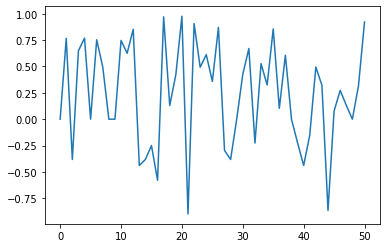

In [19]:
paraSentiment(11)

### Syntactic Interruptions in "The Stranger"

However, if we attempt to replicate the same strategy with "The Stranger", there are no conclusive results. This could be due to the more complex and intricate relations where the gendered power dynamics are less clear cut. Another possible explanation is that the pronouns this story do not always refer to the characters I’m attempting to analyze: Mr. and Mrs. Hammond. Rather, the pronouns on occasion refer to, for instance, the ship at the beginning of the story or the young man who dies in Mrs. Hammond’s arms. Further, the emotional uncertainty (as indicated by the em dashes) now occur more within the narrator, Mr. Hammond when he’s talking about his wife, Janey. This mix of pronouns makes it more difficult to parse out who is being affected and who has agency. 

In [20]:
emdashPD2 = createSeries(13, "--")
femaleObjPD2 = createSeries(13, "her", "hers")
femaleSubPD2 = createSeries(13, "she")
maleObjPD2 = createSeries(13, "him", "his")
maleSubPD2 = createSeries(13, "he")
narrPD2 = createSeries(13, "I")

<AxesSubplot:>

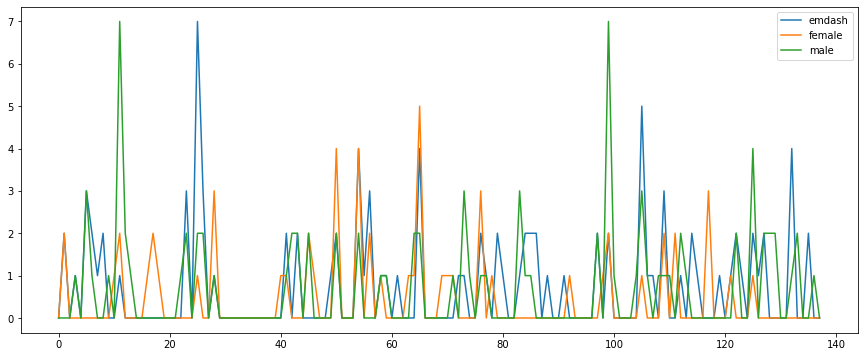

In [21]:
fullDF = pd.concat([emdashPD2, femaleSubPD2, maleSubPD2], axis= 1)
fullDF = fullDF.rename(columns={0: "emdash", 1: "female", 2: "male"})
fullDF.plot(figsize = (15,6))

The female character in question, Janey Hammond, is unlike Leila in a significant way. Leila, in her adolescence, is entering “society” for the first time. Consequently, grappling with ideas of agency is also likely new to her. Janey, on the other hand, is a full fledged adult in a marriage. As such, the em dashes function in a way that largely parallels "Her First Ball", but with a caveat. Both still reflect emotional shifts, but no longer delineates a clear decrease in female agency/increase in male agency. Rather, Janey seems to gain some degree of agency away from her husband but ultimately remains in a marriage where her agency is limited.

In [22]:
gp2 = nltk.Text(nltk.word_tokenize(gardenPartyFull[13]))
gp2.concordance("--", lines = 30)

Displaying 30 of 99 matches:
ould just see little couples parading -- little flies walking up and down the 
as a gleam of white on the lower deck -- the cook 's apron or the stewardess p
og and the shepherd . But what a fool -- what a fool he had been not to bring 
decided , as decent a crowd of people -- Those old chaps over by the gangways 
 old chaps over by the gangways , too -- fine , solid old chaps . What chests 
 fine , solid old chaps . What chests -- by Jove ! And he squared his own , pl
w watch again , and for the twentieth -- fiftieth -- hundredth time he made th
n , and for the twentieth -- fiftieth -- hundredth time he made the calculatio
ve been told if there was anything up -- do n't you , Mr . Gaven ? '' `` Oh , 
! I do n't think there 's anything to -- anything to worry about , '' said Mr.
eel of his shoe . `` At the same time -- '' '' Quite so ! Quite so ! '' cried 
 been there he 'd have got it for her -- somehow . And for a moment he was on 
took off his hat ; he r

Initially, emotional shifts seem most prominent in Mr. Hammond. As can be seen in the first few concordances, the em dashes break apart sentences in a way that emulates his nervous energy–– his anxiety in seeing his wife after spending a period of time apart. For instance, he notes how “his hands were shaking, but he’d got hold of himself again. He was able to face Janey. There she was, leaning on the rail, talking to some woman and at the same time watching him, ready for him.” Already, by looking at the pronoun switches, a degree of agency is conferred onto Janey. However, what is interesting is how the em dashes from the same paragraph is used to characterize Janey from Mr. Hammond’s point of view. “His heart was wrung with such a spasm that he could have cried out. How little she looked to have come all that long way and back by herself! Just like her, though. Just like Janey. She had the courage of a—”  He describes her as “little” and almost defenseless. When he’s about to comment on her courage, her agency, an em dash interrupts his thoughts, leaving her agency incomplete. 

We see signs that Janey flourished on the ship. That she was the “most popular woman on board”. She introduces her husband to other passengers, leads him through a ship that she is intimately familiar with. She seems to be, at least to say, in her element. As such, she seems to have gained avenues to agency while away from her husband. However, in her conversations that follow with Mr. Hammond, her dialogue is marked with yet more em dashes, signs of uncertainty, and a certain amount of deference to her husband. For instance, she asks, “Darling—do you mind? I just want to go and say good-bye to the doctor.” 

Another sign of Janey’s agency onboard the ship is when she recounts the incident with the young man. Mr. Hammond notes, “And yet he died in Janey’s arms. She—who’d never—never once in all these years—never on one single solitary occasion—”. The em dashes, a sign of Mr. Hammond’s shock, are also notable in how many are contained in a sentence beginning with “she.” Janey actively chooses an intimacy with a dying young man she met on a boat by holding him in her arms–– something that she has never done in her marriage. We see this in the awkward kiss where “her lips touched his, firmly, lightly—kissing them as she always kissed him, as though the kiss—how could he describe it?—confirmed what they were saying, signed the contract.” The kiss is in Janey’s control–– “her lips.” The female pronouns are the subject while the male pronouns are generally the object. She has the agency to withhold her affection in the marriage. However, if we examine the quote in context, she is doing so in compliance with what her husband asks even if it is the bare minimum of what he hopes.

Lastly, we see how Janey is still constrained by the contract (though that is not to say Mr. Hammond isn’t affected) at the very end. In her last words, Janey hesitantly asks her husband, “‘You’re not—sorry I told you, John darling? It hasn’t made you sad? It hasn’t spoilt our evening—our being alone together?’” Her em dashes indicate that her concern is still in the marriage. That the agency she exercised on the boat is one she is not fully comfortable with and that it was temporary. Her ultimate return to her husband and her ultimate concern for the wellbeing of their marriage demonstrates that her agency, at the end of the day, remains incomplete.

### Conclusion
In conclusion, em dashes served a two-fold purpose in Katherine Mansfield’s collection *The Garden Party, and Other Stories*. In specifically "Her First Ball" and "The Stranger", em dashes were used to indicate shifts in both the sentiment of the story as well as shifts in agency. In "Her First Ball", the story was cut along clearer lines of gendered adolescent agency. As such, we were able to use pandas graphing and concordances to examine how the protagonist, Leila, lost agency (as signified by “her”/ “hers”) when em dashes and male subject pronouns increased. In "The Stranger", we were able to parse through the more complex use of em dashes. The em dashes showed an emotional anxiety on part of Mr. Hammond, but also his attempts to characterize his wife as small, defenseless, and with less agency. In Janey, the em dashes showed her active agency being able to choose to whom she showed affection, but also ultimately showed how she was unable to achieve full agency due to her marriage.

### Works Cited
Mansfield, Katherine. “The Garden Party, and Other Stories by Katherine Mansfield.” *Project Gutenberg*, 1 Aug. 1998, gutenberg.org/ebooks/1429. 